# Patient Data Analysis

In [1]:
### MODULES ######################################################
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
### FUNCTIONS ####################################################

def view_column(df, column_names: list):
    if df[column_names[0]].dtype == "object" or str(df[column_names[0]].dtype).startswith("category"):
        barplot(df, column_names)
    else:
        boxplot(df, column_names)
        violinplot(df, column_names)
    return

def barplot(df, column_names: list):
    n = len(column_names)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 4))
    if n == 1:
        axes = [axes]

    for ax, col in zip(axes, column_names):
        # Countplot with different colors
        ax.set_axisbelow(True)  # ensure grid is behind the bars
        ax.grid(axis='y', linestyle='--', alpha=0.7)  # horizontal grid
        sns.countplot(data=df, x=col, ax=ax, palette="crest")  

        # Add count labels above each bar
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), 
                    ha="center", va="bottom")

        ax.set_title(f"Barplot of {col}")
        ax.set_ylabel("Count")
        

    plt.tight_layout()
    plt.show()

def boxplot(df, column_names: list):
    # Convert to long format
    df_long = df[column_names].melt(var_name='variable', value_name='value')
    
    plt.figure(figsize=(6 + len(column_names), 5))
    sns.boxplot(data=df_long, x='variable', y='value', palette='crest')
    plt.title("Boxplot of selected columns")
    plt.xlabel("Variable")
    plt.ylabel("Value")
    plt.show()

def violinplot(df, column_names: list):
    # Convert to long format
    df_long = df[column_names].melt(var_name='variable', value_name='value')
    
    plt.figure(figsize=(6 + len(column_names), 5))
    sns.violinplot(data=df_long, x='variable', y='value', palette='crest')
    plt.title("Violinplot of selected columns")
    plt.xlabel("Variable")
    plt.ylabel("Value")
    plt.show()

def regressionplot(df,column1,column2):
    return

## Load the dataframe

In [3]:
image_df = pd.read_csv("C:/Users/EduAm/Desktop/Escritorio/Lund/Uni/Research Project 2/clinical_labels_edu.csv")
original_df = pd.read_csv("C:/Users/EduAm/Desktop/Escritorio/Lund/Uni/Research Project 2/clinical_labels_edu.csv")
image_df.head(5)

,img,batch,comment,Channel0,Channel1,Channel2,Channel3,Channel4,Channel5,ID,...,FU_relapse_days,FU_relapse_months,FU_relapse_status,FU_relapse_status_7y,FU_DAYS,FU_MONTHS,FU_STATUS,FU_status_7y,stage_1_4,Stage3or4
0,A-1-1B.tiff,1B,Artefact,Channel0,Channel1,Channel2,Channel3,Channel4,Channel5,1.0,...,2561.0,84.13963,1.0,0.0,3295.0,108.25462,1.0,0.0,3.0,1.0
1,A-2-1B.tiff,1B,NaN,Channel0,Channel1,Channel2,Channel3,Channel4,Channel5,1.0,...,2561.0,84.13963,1.0,0.0,3295.0,108.25462,1.0,0.0,3.0,1.0
2,A-3-1B.tiff,1B,NaN,Channel0,Channel1,Channel2,Channel3,Channel4,Channel5,1.0,...,2561.0,84.13963,1.0,0.0,3295.0,108.25462,1.0,0.0,3.0,1.0
3,A-4-1B.tiff,1B,NaN,Channel0,Channel1,Channel2,Channel3,Channel4,Channel5,1.0,...,2561.0,84.13963,1.0,0.0,3295.0,108.25462,1.0,0.0,3.0,1.0
4,A-5-1B.tiff,1B,NaN,Channel0,Channel1,Channel2,Channel3,Channel4,Channel5,1.0,...,2561.0,84.13963,1.0,0.0,3295.0,108.25462,1.0,0.0,3.0,1.0


In [4]:
image_df.shape          # (rows, columns)

(906, 23)

In [5]:
image_df.columns        # list of column names

Index(['img', 'batch', 'comment', 'Channel0', 'Channel1', 'Channel2',
       'Channel3', 'Channel4', 'Channel5', 'ID', 'type', 'age_at_diagnosis',
       'Macroscop tumor free', 'FU_relapse_days', 'FU_relapse_months',
       'FU_relapse_status', 'FU_relapse_status_7y', 'FU_DAYS', 'FU_MONTHS',
       'FU_STATUS', 'FU_status_7y', 'stage_1_4', 'Stage3or4'],
      dtype='object')

In [6]:
image_df.dtypes         # data types of each column

img                      object
batch                    object
comment                  object
Channel0                 object
Channel1                 object
Channel2                 object
Channel3                 object
Channel4                 object
Channel5                 object
ID                      float64
type                     object
age_at_diagnosis        float64
Macroscop tumor free    float64
FU_relapse_days         float64
FU_relapse_months       float64
FU_relapse_status       float64
FU_relapse_status_7y    float64
FU_DAYS                 float64
FU_MONTHS               float64
FU_STATUS               float64
FU_status_7y            float64
stage_1_4               float64
Stage3or4               float64
dtype: object

In [7]:
image_df.isna().sum()   # missing values per column

img                       0
batch                     0
comment                 853
Channel0                  0
Channel1                  0
Channel2                  0
Channel3                  0
Channel4                  0
Channel5                  0
ID                       46
type                     45
age_at_diagnosis         54
Macroscop tumor free     54
FU_relapse_days          54
FU_relapse_months        54
FU_relapse_status        54
FU_relapse_status_7y     54
FU_DAYS                  54
FU_MONTHS                54
FU_STATUS                54
FU_status_7y             54
stage_1_4                54
Stage3or4                54
dtype: int64

In [8]:
image_df.nunique()      # number of unique values per column

img                     906
batch                     8
comment                   6
Channel0                  1
Channel1                  1
Channel2                  1
Channel3                  1
Channel4                  1
Channel5                  1
ID                      146
type                      2
age_at_diagnosis         36
Macroscop tumor free      2
FU_relapse_days         133
FU_relapse_months       133
FU_relapse_status         2
FU_relapse_status_7y      3
FU_DAYS                 137
FU_MONTHS               138
FU_STATUS                 2
FU_status_7y              3
stage_1_4                 4
Stage3or4                 2
dtype: int64

In [9]:
print(image_df['comment'].unique())
print(image_df['FU_status_7y'].unique())
print(image_df['FU_status_7y'].value_counts())
print("--------------------------------------------")
print(image_df['FU_relapse_status_7y'].unique())
print(image_df['FU_relapse_status_7y'].value_counts())

['Artefact' nan 'Pancreas' 'Appendix' 'missing' 'pink' 'mostly_missing']
[  0.   1.  nan 999.]
FU_status_7y
1.0      614
0.0      219
999.0     19
Name: count, dtype: int64
--------------------------------------------
[  0.   1.  nan 999.]
FU_relapse_status_7y
1.0      725
0.0      112
999.0     15
Name: count, dtype: int64


## Filter dataframe and images

In [10]:
### Remove channel columns
image_df = image_df.loc[:, ~image_df.columns.str.contains("channel", case=False)]
image_df.shape

(906, 17)

In [11]:
# Replace 'pink' with NaN
image_df['comment'] = image_df['comment'].replace('pink', np.nan)
# Remove rows with comments
image_df = image_df[image_df['comment'].isna()]
image_df.shape
# Remove comment row
image_df = image_df.drop(columns=["comment"])
image_df.shape

(854, 16)

In [12]:
# Select columns whose name contains "FU"
fu_cols = image_df.columns[image_df.columns.str.contains("FU", case=False)]

# Drop rows with NaN in those columns
image_df = image_df.dropna(subset=fu_cols)
print(image_df.shape)

# There are 999.0 values in FU 7y adn in FU relapse 7y, I assume it is a NaN and remove them
image_df = image_df[
    (image_df["FU_status_7y"] != 999.0) &
    (image_df["FU_relapse_status_7y"] != 999.0)
]
print(image_df.shape)
print(image_df['FU_status_7y'].unique())
print(image_df['FU_relapse_status_7y'].unique())


(845, 16)
(826, 16)
[0. 1.]
[0. 1.]


In [13]:
image_df.isna().sum()   # missing values per column

img                     0
batch                   0
ID                      0
type                    0
age_at_diagnosis        0
Macroscop tumor free    0
FU_relapse_days         0
FU_relapse_months       0
FU_relapse_status       0
FU_relapse_status_7y    0
FU_DAYS                 0
FU_MONTHS               0
FU_STATUS               0
FU_status_7y            0
stage_1_4               0
Stage3or4               0
dtype: int64

In [14]:
image_df.nunique() 
### Seems like one patient was dropped

img                     826
batch                     8
ID                      138
type                      2
age_at_diagnosis         35
Macroscop tumor free      2
FU_relapse_days         130
FU_relapse_months       130
FU_relapse_status         2
FU_relapse_status_7y      2
FU_DAYS                 134
FU_MONTHS               135
FU_STATUS                 2
FU_status_7y              2
stage_1_4                 4
Stage3or4                 2
dtype: int64

In [15]:
image_df.head(10)

,img,batch,ID,type,age_at_diagnosis,Macroscop tumor free,FU_relapse_days,FU_relapse_months,FU_relapse_status,FU_relapse_status_7y,FU_DAYS,FU_MONTHS,FU_STATUS,FU_status_7y,stage_1_4,Stage3or4
1,A-2-1B.tiff,1B,1.0,primary,67.0,1.0,2561.0,84.139630,1.0,0.0,3295.0,108.254620,1.0,0.0,3.0,1.0
2,A-3-1B.tiff,1B,1.0,primary,67.0,1.0,2561.0,84.139630,1.0,0.0,3295.0,108.254620,1.0,0.0,3.0,1.0
3,A-4-1B.tiff,1B,1.0,primary,67.0,1.0,2561.0,84.139630,1.0,0.0,3295.0,108.254620,1.0,0.0,3.0,1.0
4,A-5-1B.tiff,1B,1.0,metastases,67.0,1.0,2561.0,84.139630,1.0,0.0,3295.0,108.254620,1.0,0.0,3.0,1.0
5,A-6-1B.tiff,1B,1.0,metastases,67.0,1.0,2561.0,84.139630,1.0,0.0,3295.0,108.254620,1.0,0.0,3.0,1.0
6,A-7-1B.tiff,1B,2.0,primary,58.0,1.0,416.0,13.667351,1.0,1.0,611.0,20.073922,1.0,1.0,2.0,0.0
7,A-8-1B.tiff,1B,2.0,primary,58.0,1.0,416.0,13.667351,1.0,1.0,611.0,20.073922,1.0,1.0,2.0,0.0
8,A-9-1B.tiff,1B,2.0,primary,58.0,1.0,416.0,13.667351,1.0,1.0,611.0,20.073922,1.0,1.0,2.0,0.0
9,A-10-1B.tiff,1B,2.0,primary,58.0,1.0,416.0,13.667351,1.0,1.0,611.0,20.073922,1.0,1.0,2.0,0.0
10,B-1-1B.tiff,1B,4.0,metastases,53.0,0.0,365.0,11.991786,1.0,1.0,1189.0,39.063655,1.0,1.0,3.0,1.0


### Reorganise images to match labels

In [19]:
### Rename images properly
image_folder = image_folder = Path("path/to/your/images")

for file in image_folder.iterdir():
    if file.is_file() and "-667" in file.name:
        new_name = file.name.replace("-667", "")
        file.rename(file.with_name(new_name))

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'path\\to\\your\\images'

In [ ]:
# Move the images with an associated label
valid_image_list = list(image_df['img'])

valid_image_folder =  Path("")
valid_image_folder.mkdir(exist_ok=True, parents=True)

for file in image_folder.iterdir():
    if file.is_file() and (file.name in valid_image_list):
        # Read the bytes from the original file and write to the new location
        valid_image_folder.joinpath(file.name).write_bytes(file.read_bytes())

['A-2-1B.tiff', 'A-3-1B.tiff', 'A-4-1B.tiff', 'A-5-1B.tiff', 'A-6-1B.tiff', 'A-7-1B.tiff', 'A-8-1B.tiff', 'A-9-1B.tiff', 'A-10-1B.tiff', 'B-1-1B.tiff', 'B-2-1B.tiff', 'B-3-1B.tiff', 'B-4-1B.tiff', 'B-5-1B.tiff', 'B-6-1B.tiff', 'B-7-1B.tiff', 'B-8-1B.tiff', 'B-9-1B.tiff', 'B-10-1B.tiff', 'C-1-1B.tiff', 'C-2-1B.tiff', 'C-3-1B.tiff', 'C-4-1B.tiff', 'C-5-1B.tiff', 'C-6-1B.tiff', 'C-7-1B.tiff', 'C-8-1B.tiff', 'C-9-1B.tiff', 'C-10-1B.tiff', 'C-11-1B.tiff', 'C-12-1B.tiff', 'D-1-1B.tiff', 'D-2-1B.tiff', 'D-3-1B.tiff', 'D-4-1B.tiff', 'D-5-1B.tiff', 'D-6-1B.tiff', 'D-7-1B.tiff', 'D-8-1B.tiff', 'D-11-1B.tiff', 'D-12-1B.tiff', 'E-1-1B.tiff', 'E-2-1B.tiff', 'E-3-1B.tiff', 'E-4-1B.tiff', 'E-5-1B.tiff', 'E-6-1B.tiff', 'E-7-1B.tiff', 'E-8-1B.tiff', 'E-9-1B.tiff', 'E-10-1B.tiff', 'E-11-1B.tiff', 'F-1-1B.tiff', 'F-2-1B.tiff', 'F-3-1B.tiff', 'F-4-1B.tiff', 'F-5-1B.tiff', 'F-6-1B.tiff', 'F-7-1B.tiff', 'F-8-1B.tiff', 'F-9-1B.tiff', 'F-10-1B.tiff', 'F-11-1B.tiff', 'F-12-1B.tiff', 'G-1-1B.tiff', 'G-2-1B.tiff

## Visualise variables and stats

In [16]:
# Make true patient df. I want one row per ID
# All columns except 'img' and 'ID'
other_cols = [col for col in image_df.columns if col not in ["img", "ID"]]

# Group by ID
patient_df = image_df.groupby("ID").agg({
    "img": list,       # combine all image names into a list
    **{col: "first" for col in other_cols}  # keep the first value for all other columns
}).reset_index()
patient_df['n_img'] = patient_df['img'].apply(len)
patient_df.head(3)
patient_df.shape


(138, 17)

C:\Users\EduAm\AppData\Local\Temp\ipykernel_33344\4123294237.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, palette="crest")
C:\Users\EduAm\AppData\Local\Temp\ipykernel_33344\4123294237.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, palette="crest")
C:\Users\EduAm\AppData\Local\Temp\ipykernel_33344\4123294237.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, palette="crest")


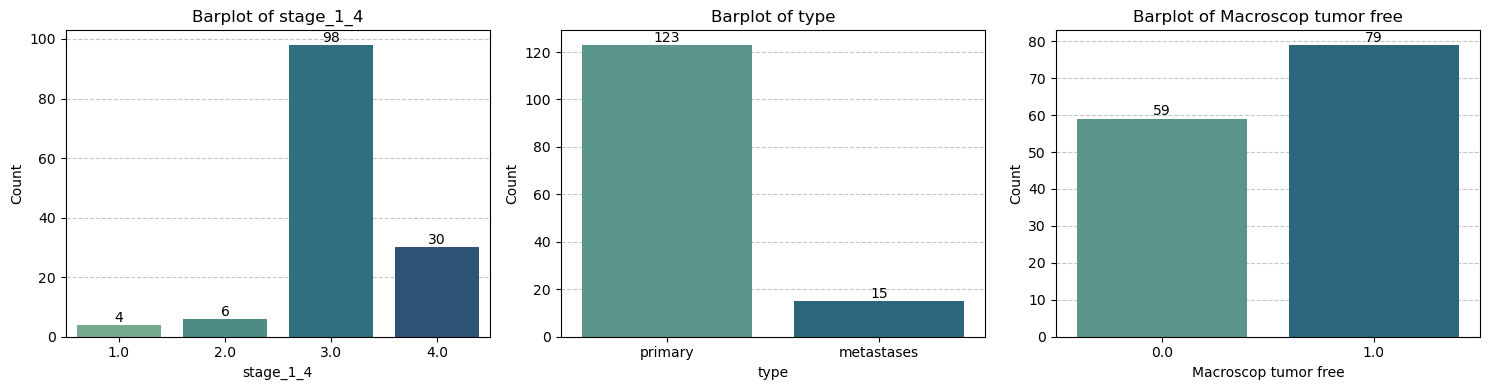

In [17]:
barplot(patient_df,["stage_1_4","type", "Macroscop tumor free"])

C:\Users\EduAm\AppData\Local\Temp\ipykernel_37324\4123294237.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, palette="crest")
C:\Users\EduAm\AppData\Local\Temp\ipykernel_37324\4123294237.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, palette="crest")
C:\Users\EduAm\AppData\Local\Temp\ipykernel_37324\4123294237.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, palette="crest")
C:\Users\EduAm\AppData\Local\Temp\ipykernel_37324\4123294237.py:21: FutureWarni

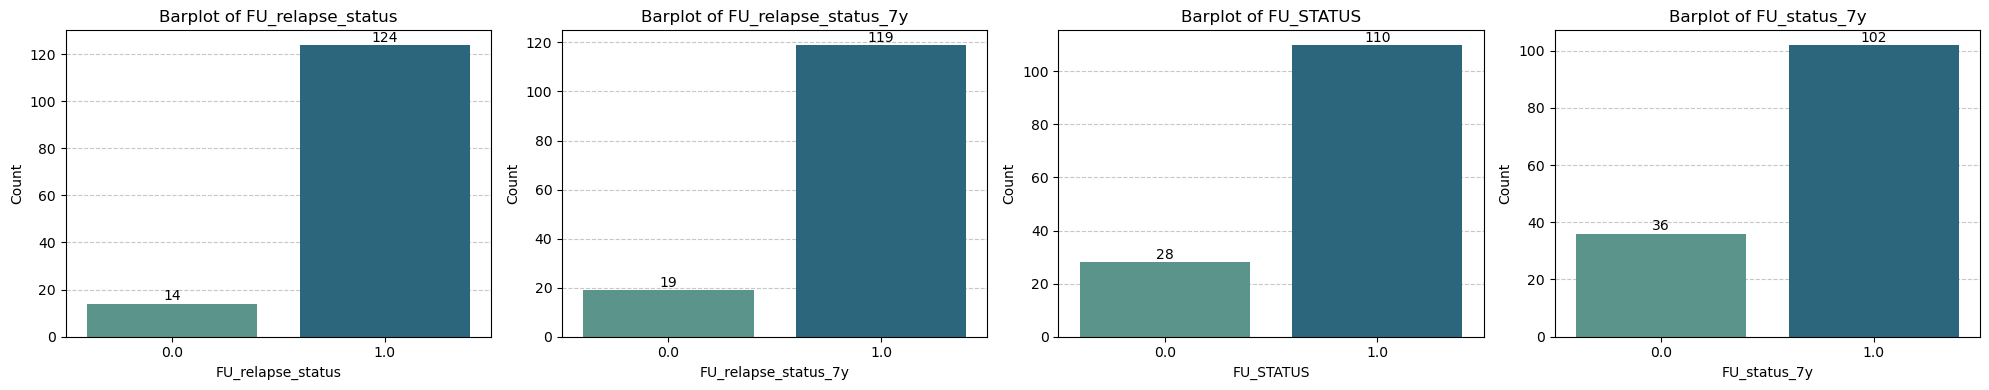

In [18]:
barplot(patient_df,["FU_relapse_status","FU_relapse_status_7y","FU_STATUS","FU_status_7y"])

C:\Users\EduAm\AppData\Local\Temp\ipykernel_37324\4123294237.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x='variable', y='value', palette='crest')


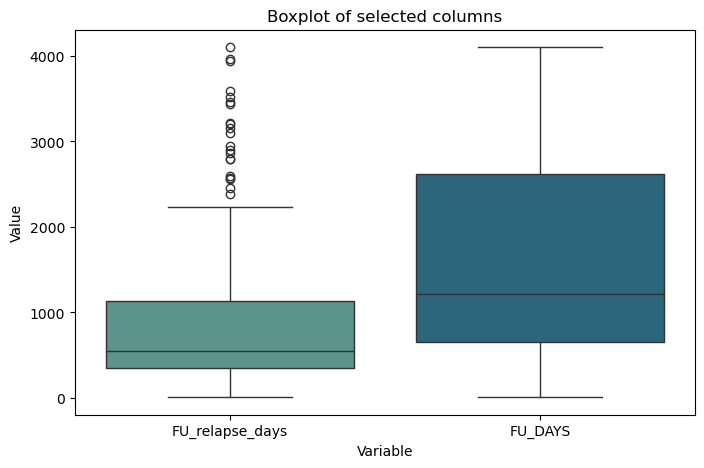

C:\Users\EduAm\AppData\Local\Temp\ipykernel_37324\4123294237.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x='variable', y='value', palette='crest')


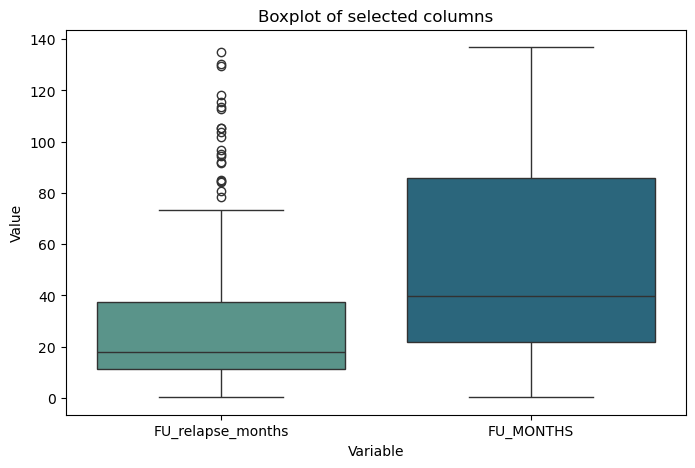

In [19]:
boxplot(patient_df, ["FU_relapse_days","FU_DAYS"])
boxplot(patient_df, ["FU_relapse_months","FU_MONTHS"])

## Group patients

### Categorical grouping

In [18]:
### 2 fold classification for survival
# Compute the terciles
q50 = patient_df['FU_DAYS'].quantile(0.5)

# Create a new column with risk categories
def assign_risk(days):
    if days <= q50:
        return "Risk_1"
    else:
        return "Risk_2"

patient_df["Survival_risk_quart_2"] = patient_df["FU_DAYS"].apply(assign_risk)

### 3 fold classification for relapse
# Compute the terciles
q50 = patient_df['FU_relapse_days'].quantile(0.5)

# Create a new column with risk categories
def assign_risk(days):
    if days <= q50:
        return "Risk_1"
    else:
        return "Risk_2"

patient_df["Relapse_risk_quart_2"] = patient_df["FU_relapse_days"].apply(assign_risk)

In [19]:
### 3 fold classification for survival
# Compute the terciles
q33 = patient_df['FU_DAYS'].quantile(0.33)
q66 = patient_df['FU_DAYS'].quantile(0.66)

# Create a new column with risk categories
def assign_risk(days):
    if days <= q33:
        return "Risk_1"
    elif days <= q66:
        return "Risk_2"
    else:
        return "Risk_3"

patient_df["Survival_risk_quart_3"] = patient_df["FU_DAYS"].apply(assign_risk)

### 3 fold classification for relapse
# Compute the terciles
q33 = patient_df['FU_relapse_days'].quantile(0.33)
q66 = patient_df['FU_relapse_days'].quantile(0.66)

# Create a new column with risk categories
def assign_risk(days):
    if days <= q33:
        return "Risk_1"
    elif days <= q66:
        return "Risk_2"
    else:
        return "Risk_3"

patient_df["Relapse_risk_quart_3"] = patient_df["FU_relapse_days"].apply(assign_risk)


In [20]:
### 4 fold classification for survival
# Compute the quartiles
q25 = patient_df['FU_DAYS'].quantile(0.25)
q50 = patient_df['FU_DAYS'].quantile(0.50)
q75 = patient_df['FU_DAYS'].quantile(0.75)

# Create a new column with risk categories
def assign_risk(days):
    if days <= q25:
        return "Risk_1"
    elif days <= q50:
        return "Risk_2"
    elif days <= q75:
        return "Risk_3"
    else:
        return "Risk_4"

patient_df["Survival_risk_quart_4"] = patient_df["FU_DAYS"].apply(assign_risk)

### 4 fold classification for relapse
# Compute the quartiles
q25 = patient_df['FU_relapse_days'].quantile(0.25)
q50 = patient_df['FU_relapse_days'].quantile(0.50)
q75 = patient_df['FU_relapse_days'].quantile(0.75)

# Create a new column with risk categories
def assign_risk(days):
    if days <= q25:
        return "Risk_1"
    elif days <= q50:
        return "Risk_2"
    elif days <= q75:
        return "Risk_3"
    else:
        return "Risk_4"

patient_df["Relapse_risk_quart_4"] = patient_df["FU_relapse_days"].apply(assign_risk)


In [21]:
patient_df.head(5)

,ID,img,batch,type,age_at_diagnosis,Macroscop tumor free,FU_relapse_days,FU_relapse_months,FU_relapse_status,FU_relapse_status_7y,...,FU_status_7y,stage_1_4,Stage3or4,n_img,Survival_risk_quart_2,Relapse_risk_quart_2,Survival_risk_quart_3,Relapse_risk_quart_3,Survival_risk_quart_4,Relapse_risk_quart_4
0,1.0,"[A-2-1B.tiff, A-3-1B.tiff, A-4-1B.tiff, A-5-1B...",1B,primary,67.0,1.0,2561.0,84.139630,1.0,0.0,...,0.0,3.0,1.0,5,Risk_2,Risk_2,Risk_3,Risk_3,Risk_4,Risk_4
1,2.0,"[A-7-1B.tiff, A-8-1B.tiff, A-9-1B.tiff, A-10-1...",1B,primary,58.0,1.0,416.0,13.667351,1.0,1.0,...,1.0,2.0,0.0,4,Risk_1,Risk_1,Risk_1,Risk_2,Risk_1,Risk_2
2,4.0,"[B-1-1B.tiff, B-2-1B.tiff, B-3-1B.tiff, B-4-1B...",1B,metastases,53.0,0.0,365.0,11.991786,1.0,1.0,...,1.0,3.0,1.0,6,Risk_1,Risk_1,Risk_2,Risk_1,Risk_2,Risk_2
3,6.0,"[B-5-1B.tiff, B-6-1B.tiff, B-7-1B.tiff, B-8-1B...",1B,metastases,65.0,0.0,523.0,17.182752,1.0,1.0,...,0.0,3.0,1.0,4,Risk_2,Risk_1,Risk_3,Risk_2,Risk_4,Risk_2
4,7.0,"[B-9-1B.tiff, B-10-1B.tiff, C-1-1B.tiff, C-2-1...",1B,primary,75.0,0.0,263.0,8.640657,1.0,1.0,...,1.0,3.0,1.0,6,Risk_1,Risk_1,Risk_1,Risk_1,Risk_1,Risk_1


### Kmeans clustering

I will cluster based on age and survival days or survival and relapse, we'll see

In [22]:
X = patient_df[['age_at_diagnosis','FU_relapse_days', 'FU_DAYS']]
X.head()

,age_at_diagnosis,FU_relapse_days,FU_DAYS
0,67.0,2561.0,3295.0
1,58.0,416.0,611.0
2,53.0,365.0,1189.0
3,65.0,523.0,2625.0
4,75.0,263.0,263.0


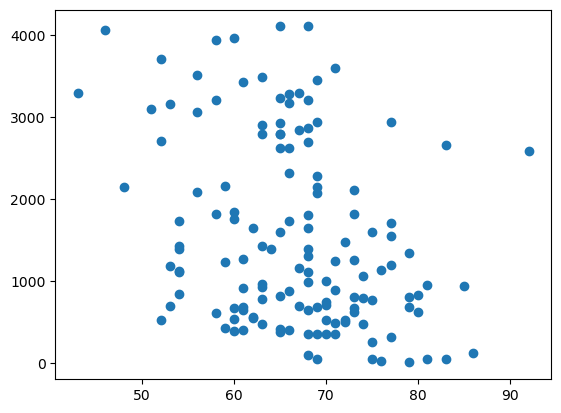

In [23]:
# Visualise age vs survival
plt.scatter(x=X['age_at_diagnosis'],y=X['FU_DAYS'])

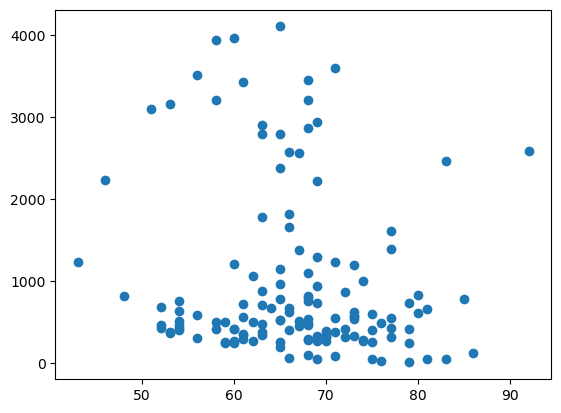

In [24]:
# Visualise age vs relapse
plt.scatter(x=X['age_at_diagnosis'],y=X['FU_relapse_days'])


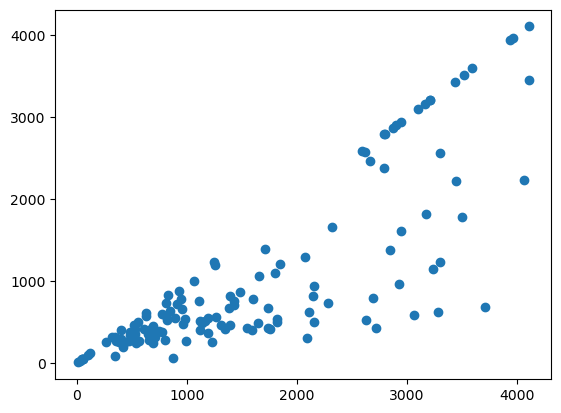

In [25]:
# Visualise survival vs relapse
plt.scatter(x=X['FU_DAYS'],y=X['FU_relapse_days'])

The combination i like the most is age and survival, more clear and spread downwards trend. I will cluster based on that.
UPDATE: We need clusters for both survival and relapse

### K means models for survival

In [26]:
# K means model for survival
X = patient_df[['FU_DAYS']]
km_2 = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=1)
y_km_2_surv = km_2.fit_predict(X)
km_3 = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=1)
y_km_3_surv = km_3.fit_predict(X)
km_4 = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=1)
y_km_4_surv = km_4.fit_predict(X)
X['Survival_km_3'] = y_km_3_surv
X['Survival_km_4'] = y_km_4_surv



c:\Users\EduAm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\EduAm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\EduAm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\EduAm\AppData\Local\Temp\ipykernel_33344\171104856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

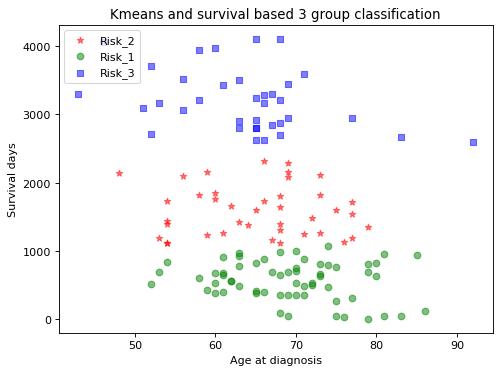

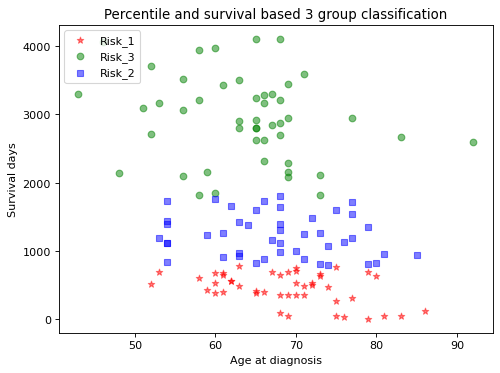

In [31]:
clusters = [0, 1, 2]
risks = ["Risk_1","Risk_3","Risk_2"]
markers = ['*', 'o', 's']
colors = ['red', 'green', 'blue']

plt.figure(figsize=(7, 5), dpi=80)

for i in clusters:
    plt.scatter(
        patient_df.loc[y_km_3_surv == i, "age_at_diagnosis"],   # column name instead of 0
        patient_df.loc[y_km_3_surv == i, "FU_DAYS"],     # column name instead of 1
        c=colors[i],
        alpha=0.5,
        marker=markers[i],
        label=f"Cluster {i}"
    )
plt.title("Kmeans and survival based 3 group classification")
plt.xlabel("Age at diagnosis")
plt.ylabel("Survival days")
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Risk_2", "Risk_1", "Risk_3"], loc='upper left')
plt.show()

risks_3 = patient_df['Survival_risk_quart_3']
plt.figure(figsize=(7, 5), dpi=80)

for i in range(len(risks)):
    plt.scatter(
        patient_df.loc[risks_3 == risks[i], "age_at_diagnosis"],   # column name instead of 0
        patient_df.loc[risks_3 == risks[i], "FU_DAYS"],     # column name instead of 1
        c=colors[i],
        alpha=0.5,
        marker=markers[i],
        label=risks[i]
    )
plt.title("Percentile and survival based 3 group classification")
plt.xlabel("Age at diagnosis")
plt.ylabel("Survival days")
plt.legend(loc='upper left')
plt.show()


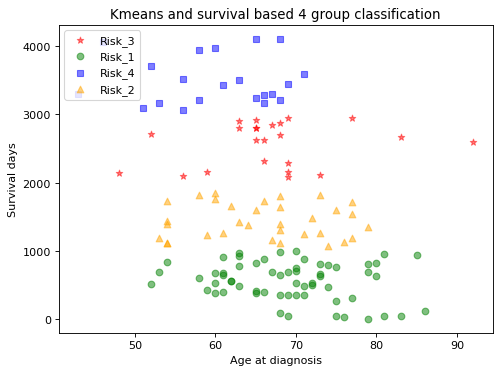

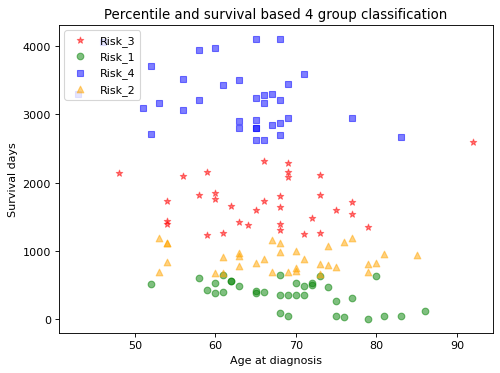

In [32]:
#Visualise clusters km4
clusters = [0, 1, 2, 3]
risks = ["Risk_3","Risk_1","Risk_4","Risk_2"]
markers = ['*', 'o', 's','^']
colors = ['red', 'green', 'blue','orange']

plt.figure(figsize=(7, 5), dpi=80)

for i in clusters:
    plt.scatter(
        patient_df.loc[y_km_4_surv == i, "age_at_diagnosis"],   # column name instead of 0
        patient_df.loc[y_km_4_surv == i, "FU_DAYS"],     # column name instead of 1
        c=colors[i],
        alpha=0.5,
        marker=markers[i],
        label=f"Cluster {i}"
    )
plt.title("Kmeans and survival based 4 group classification")
plt.xlabel("Age at diagnosis")
plt.ylabel("Survival days")
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Risk_3", "Risk_1", "Risk_4", "Risk_2"], loc='upper left')
plt.show()

risks_4 = patient_df['Survival_risk_quart_4']
plt.figure(figsize=(7, 5), dpi=80)

for i in range(len(risks)):
    plt.scatter(
        patient_df.loc[risks_4 == risks[i], "age_at_diagnosis"],   # column name instead of 0
        patient_df.loc[risks_4 == risks[i], "FU_DAYS"],     # column name instead of 1
        c=colors[i],
        alpha=0.5,
        marker=markers[i],
        label=risks[i]
    )
plt.title("Percentile and survival based 4 group classification")
plt.xlabel("Age at diagnosis")
plt.ylabel("Survival days")
plt.legend(loc='upper left')
plt.show()


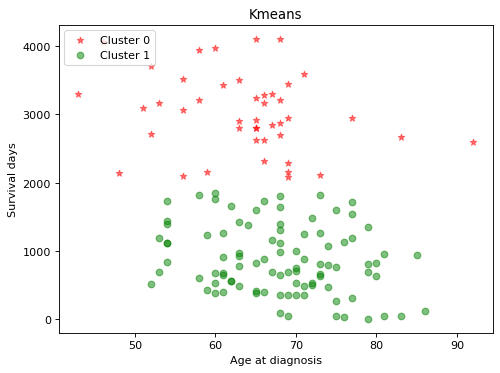

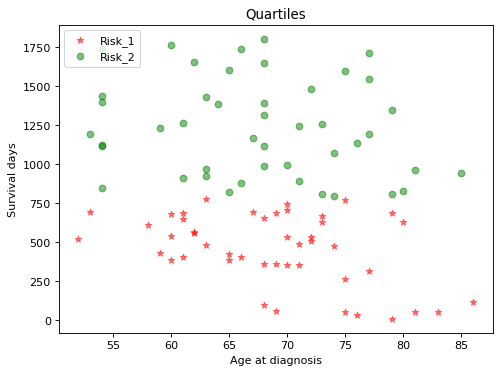

In [33]:
clusters = [0, 1]
risks = ["Risk_1","Risk_2"]
markers = ['*', 'o']
colors = ['red', 'green']

plt.figure(figsize=(7, 5), dpi=80)

for i in clusters:
    plt.scatter(
        patient_df.loc[y_km_2_surv == i, "age_at_diagnosis"],   # column name instead of 0
        patient_df.loc[y_km_2_surv == i, "FU_DAYS"],     # column name instead of 1
        c=colors[i],
        alpha=0.5,
        marker=markers[i],
        label=f"Cluster {i}"
    )
plt.title("Kmeans")
plt.xlabel("Age at diagnosis")
plt.ylabel("Survival days")
plt.legend(loc='upper left')
plt.show()

risks_2 = patient_df['Survival_risk_quart_2']
plt.figure(figsize=(7, 5), dpi=80)

for i in range(len(risks)):
    plt.scatter(
        patient_df.loc[risks_3 == risks[i], "age_at_diagnosis"],   # column name instead of 0
        patient_df.loc[risks_3 == risks[i], "FU_DAYS"],     # column name instead of 1
        c=colors[i],
        alpha=0.5,
        marker=markers[i],
        label=risks[i]
    )
plt.title("Quartiles")
plt.xlabel("Age at diagnosis")
plt.ylabel("Survival days")
plt.legend(loc='upper left')
plt.show()

c:\Users\EduAm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\EduAm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\EduAm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\EduAm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

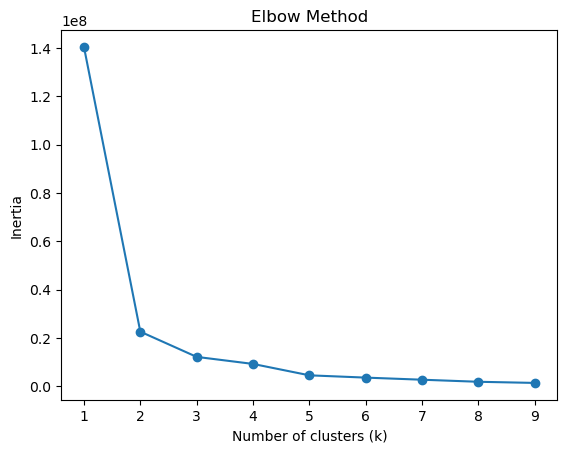

In [34]:
# Elbow method
X = patient_df[['FU_relapse_days']]
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

### K means models for relapse

In [35]:
# K means model for relapse
X = patient_df[['FU_relapse_days']]
km_2 = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=1)
y_km_2_rel = km_2.fit_predict(X)
km_3 = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=1)
y_km_3_rel = km_3.fit_predict(X)
km_4 = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=1)
y_km_4_rel = km_4.fit_predict(X)
X['km_3'] = y_km_3_rel
X['km_4'] = y_km_4_rel



c:\Users\EduAm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\EduAm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\EduAm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\EduAm\AppData\Local\Temp\ipykernel_33344\2218594919.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

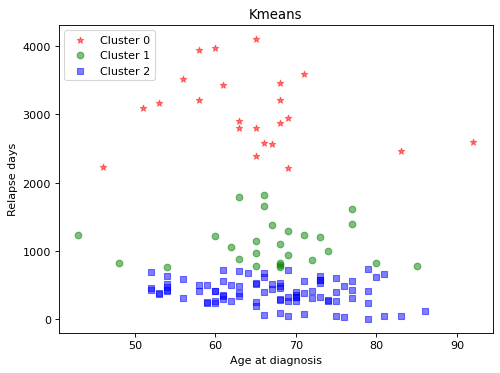

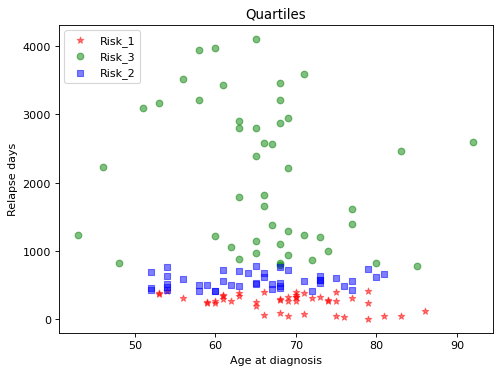

In [36]:
clusters = [0, 1, 2]
risks = ["Risk_1","Risk_3","Risk_2"]
markers = ['*', 'o', 's']
colors = ['red', 'green', 'blue']

plt.figure(figsize=(7, 5), dpi=80)

for i in clusters:
    plt.scatter(
        patient_df.loc[y_km_3_rel == i, "age_at_diagnosis"],   # column name instead of 0
        patient_df.loc[y_km_3_rel == i, "FU_relapse_days"],     # column name instead of 1
        c=colors[i],
        alpha=0.5,
        marker=markers[i],
        label=f"Cluster {i}"
    )
plt.title("Kmeans")
plt.xlabel("Age at diagnosis")
plt.ylabel("Relapse days")
plt.legend(loc='upper left')
plt.show()

risks_3 = patient_df['Relapse_risk_quart_3']
plt.figure(figsize=(7, 5), dpi=80)

for i in range(len(risks)):
    plt.scatter(
        patient_df.loc[risks_3 == risks[i], "age_at_diagnosis"],   # column name instead of 0
        patient_df.loc[risks_3 == risks[i], "FU_relapse_days"],     # column name instead of 1
        c=colors[i],
        alpha=0.5,
        marker=markers[i],
        label=risks[i]
    )
plt.title("Quartiles")
plt.xlabel("Age at diagnosis")
plt.ylabel("Relapse days")
plt.legend(loc='upper left')
plt.show()


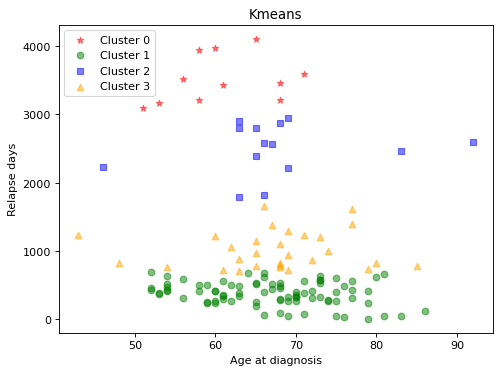

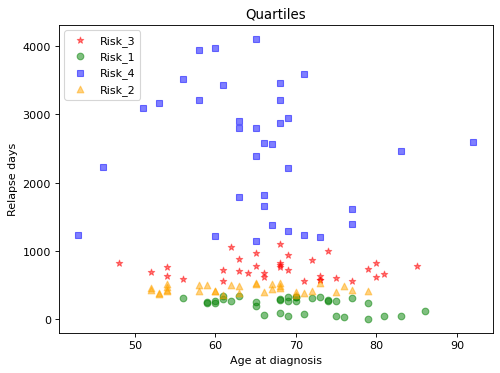

In [37]:
#Visualise clusters km4
clusters = [0, 1, 2, 3]
risks = ["Risk_3","Risk_1","Risk_4","Risk_2"]
markers = ['*', 'o', 's','^']
colors = ['red', 'green', 'blue','orange']

plt.figure(figsize=(7, 5), dpi=80)

for i in clusters:
    plt.scatter(
        patient_df.loc[y_km_4_rel == i, "age_at_diagnosis"],   # column name instead of 0
        patient_df.loc[y_km_4_rel == i, "FU_relapse_days"],     # column name instead of 1
        c=colors[i],
        alpha=0.5,
        marker=markers[i],
        label=f"Cluster {i}"
    )
plt.title("Kmeans")
plt.xlabel("Age at diagnosis")
plt.ylabel("Relapse days")
plt.legend(loc='upper left')
plt.show()

risks_4 = patient_df['Relapse_risk_quart_4']
plt.figure(figsize=(7, 5), dpi=80)

for i in range(len(risks)):
    plt.scatter(
        patient_df.loc[risks_4 == risks[i], "age_at_diagnosis"],   # column name instead of 0
        patient_df.loc[risks_4 == risks[i], "FU_relapse_days"],     # column name instead of 1
        c=colors[i],
        alpha=0.5,
        marker=markers[i],
        label=risks[i]
    )
plt.title("Quartiles")
plt.xlabel("Age at diagnosis")
plt.ylabel("Relapse days")
plt.legend(loc='upper left')
plt.show()


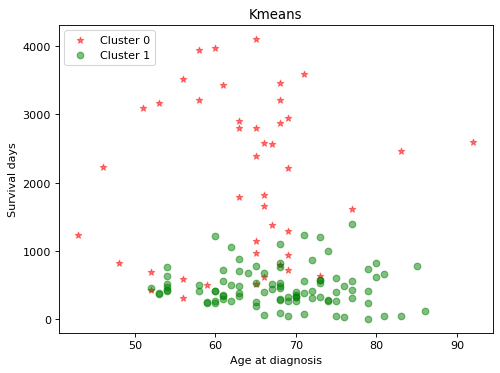

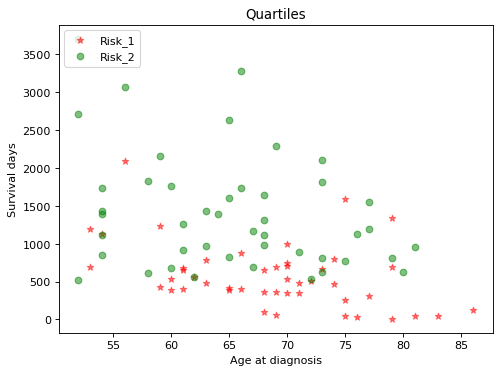

In [38]:
clusters = [0, 1]
risks = ["Risk_1","Risk_2"]
markers = ['*', 'o']
colors = ['red', 'green']

plt.figure(figsize=(7, 5), dpi=80)

for i in clusters:
    plt.scatter(
        patient_df.loc[y_km_2_surv == i, "age_at_diagnosis"],   # column name instead of 0
        patient_df.loc[y_km_2_surv == i, "FU_relapse_days"],     # column name instead of 1
        c=colors[i],
        alpha=0.5,
        marker=markers[i],
        label=f"Cluster {i}"
    )
plt.title("Kmeans")
plt.xlabel("Age at diagnosis")
plt.ylabel("Survival days")
plt.legend(loc='upper left')
plt.show()

risks_2 = patient_df['Relapse_risk_quart_2']
plt.figure(figsize=(7, 5), dpi=80)

for i in range(len(risks)):
    plt.scatter(
        patient_df.loc[risks_3 == risks[i], "age_at_diagnosis"],   # column name instead of 0
        patient_df.loc[risks_3 == risks[i], "FU_DAYS"],     # column name instead of 1
        c=colors[i],
        alpha=0.5,
        marker=markers[i],
        label=risks[i]
    )
plt.title("Quartiles")
plt.xlabel("Age at diagnosis")
plt.ylabel("Survival days")
plt.legend(loc='upper left')
plt.show()

According to this rough metric, the ideal number of clusters is between 2 and 3. 4 is already overspliting the data

### Overlap between categorical and kmeans

In [39]:
# Transform cluster labels into risk levels
patient_df['Survival_risk_km_2'] = y_km_2_surv
patient_df['Survival_risk_km_3'] = y_km_3_surv
patient_df['Survival_risk_km_4'] = y_km_4_surv

# For 3 clusters 0= Risk 1 (High), 1 = Risk 3(Lowest), 2= Risk 2
def assign_risk(cluster):
    if cluster == 0:
        return "Risk_2"
    else:
        return "Risk_1"

patient_df["Survival_risk_km_2"] = patient_df["Survival_risk_km_2"].apply(assign_risk)

# For 3 clusters 0= Risk 1 (High), 1 = Risk 3(Lowest), 2= Risk 2
def assign_risk(cluster):
    if cluster == 0:
        return "Risk_1"
    elif cluster == 1:
        return "Risk_3"
    else:
        return "Risk_2"

patient_df["Survival_risk_km_3"] = patient_df["Survival_risk_km_3"].apply(assign_risk)
# For 4 clusters 0 = Risk 3, 1 = Risk 1 (Highest), 2 = Risk 4 (Lowest), 3 = Risk_2 

def assign_risk(cluster):
    if cluster == 0:
        return "Risk_3"
    elif cluster == 1:
        return "Risk_1"
    elif cluster == 2:
        return "Risk_4"
    else:
        return "Risk_2"

patient_df["Survival_risk_km_4"] = patient_df["Survival_risk_km_4"].apply(assign_risk)

In [40]:
### RELAPSE

# Transform cluster labels into risk levels

patient_df['Relapse_risk_km_2'] = y_km_2_rel
patient_df['Relapse_risk_km_3'] = y_km_3_rel
patient_df['Relapse_risk_km_4'] = y_km_4_rel

# For 3 clusters 0= Risk 1 (High), 1 = Risk 3(Lowest), 2= Risk 2
def assign_risk(cluster):
    if cluster == 0:
        return "Risk_2"
    else:
        return "Risk_1"

patient_df["Relapse_risk_km_2"] = patient_df["Relapse_risk_km_2"].apply(assign_risk)

# For 3 clusters 0= Risk 1 (High), 1 = Risk 3(Lowest), 2= Risk 2
def assign_risk(cluster):
    if cluster == 0:
        return "Risk_1"
    elif cluster == 1:
        return "Risk_2"
    else:
        return "Risk_3"

patient_df["Relapse_risk_km_3"] = patient_df["Relapse_risk_km_3"].apply(assign_risk)
# For 4 clusters 0 = Risk 3, 1 = Risk 1 (Highest), 2 = Risk 4 (Lowest), 3 = Risk_2 

def assign_risk(cluster):
    if cluster == 0:
        return "Risk_2"
    elif cluster == 1:
        return "Risk_4"
    elif cluster == 2:
        return "Risk_1"
    else:
        return "Risk_3"

patient_df["Relapse_risk_km_4"] = patient_df["Relapse_risk_km_4"].apply(assign_risk)

In [41]:
patient_df.head(3)

,ID,img,batch,type,age_at_diagnosis,Macroscop tumor free,FU_relapse_days,FU_relapse_months,FU_relapse_status,FU_relapse_status_7y,...,Survival_risk_quart_3,Relapse_risk_quart_3,Survival_risk_quart_4,Relapse_risk_quart_4,Survival_risk_km_2,Survival_risk_km_3,Survival_risk_km_4,Relapse_risk_km_2,Relapse_risk_km_3,Relapse_risk_km_4
0,1.0,"[A-2-1B.tiff, A-3-1B.tiff, A-4-1B.tiff, A-5-1B...",1B,primary,67.0,1.0,2561.0,84.139630,1.0,0.0,...,Risk_3,Risk_3,Risk_4,Risk_4,Risk_2,Risk_2,Risk_4,Risk_2,Risk_1,Risk_1
1,2.0,"[A-7-1B.tiff, A-8-1B.tiff, A-9-1B.tiff, A-10-1...",1B,primary,58.0,1.0,416.0,13.667351,1.0,1.0,...,Risk_1,Risk_2,Risk_1,Risk_2,Risk_1,Risk_3,Risk_1,Risk_1,Risk_3,Risk_4
2,4.0,"[B-1-1B.tiff, B-2-1B.tiff, B-3-1B.tiff, B-4-1B...",1B,metastases,53.0,0.0,365.0,11.991786,1.0,1.0,...,Risk_2,Risk_1,Risk_2,Risk_2,Risk_1,Risk_1,Risk_2,Risk_1,Risk_3,Risk_4


In [42]:
patient_df.to_csv("C:/Users/EduAm/Desktop/Escritorio/Lund/Uni/Research Project 2/all_labels_patients.csv")

In [46]:
# Choose the risk classification column you want to summarize
risk_col = ["Survival_risk_km_3","Survival_risk_quart_3","Survival_risk_km_4","Survival_risk_quart_4","Relapse_risk_km_3","Relapse_risk_quart_3","Relapse_risk_km_4","Relapse_risk_quart_4"]
for i in risk_col:
    # Drop rows with missing risk classification
    petient_df_risk = patient_df.dropna(subset=[i])

    # Compute the summary table
    summary = (
        petient_df_risk.groupby(i)
        .agg(
            n_patients=('ID', 'count'),
            mean_age=('age_at_diagnosis', 'mean'),
            mean_survival_days=('FU_relapse_days', 'mean')
        )
        .reset_index()
    )

    # Compute percentages
    summary['percentage'] = (summary['n_patients'] / summary['n_patients'].sum()) * 100

    # Reorder columns nicely
    summary = summary[[i, 'n_patients', 'percentage', 'mean_age', 'mean_survival_days']]

    # Round values for neatness
    summary = summary.round({'percentage': 2, 'mean_age': 1, 'mean_survival_days': 1})
    print("-------------------------------------------")
    print(summary)

-------------------------------------------
  Survival_risk_km_3  n_patients  percentage  mean_age  mean_survival_days
0             Risk_1          40       28.99      65.2               709.4
1             Risk_2          36       26.09      63.6              2321.8
2             Risk_3          62       44.93      69.2               374.8
-------------------------------------------
  Survival_risk_quart_3  n_patients  percentage  mean_age  mean_survival_days
0                Risk_1          46       33.33      68.7               297.6
1                Risk_2          45       32.61      67.4               639.8
2                Risk_3          47       34.06      63.6              1972.7
-------------------------------------------
  Survival_risk_km_4  n_patients  percentage  mean_age  mean_survival_days
0             Risk_1          61       44.20      69.1               364.5
1             Risk_2          33       23.91      65.8               681.7
2             Risk_3          2

In [66]:
# Calculate overlap between classifications
matches_3 = []
matches_4 = []
for idx,row in patient_df.iterrows():
    if row['Risk_km_3'] == row['Risk_3_fold']:
        matches_3.append(1)
    else:
        matches_3.append(0)
    
    if row['Risk_km_4'] == row['Risk_4_fold']:
        matches_4.append(1)
    else:
        matches_4.append(0)
    
patient_df['Overlap_3'] = matches_3
patient_df['Overlap_4'] = matches_4
print(patient_df['Overlap_3'].value_counts())
print(patient_df['Overlap_4'].value_counts())

Overlap_3
1    117
0     24
Name: count, dtype: int64
Overlap_4
1    80
0    61
Name: count, dtype: int64


## NaroNet inputs

Here I generate the xlsx files with the labels that i might be interested in using in NaroNet. Notably
- Plain FU numbers
- K means risk clusters
- Categories of risk related to FU
- Categories of risk unrelated to FU


In [51]:
image_surv_quart_2 = []
image_surv_quart_3 = []
image_surv_quart_4 = []

image_surv_km_2 = []
image_surv_km_3 = []
image_surv_km_4 = []

for idx, row in image_df.iterrows():
    pid = row['ID']
    match = patient_df.loc[patient_df['ID'] == pid]

    if not match.empty:
        patient_row = match.iloc[0]
        image_surv_quart_2.append(patient_row['Survival_risk_quart_2'])
        image_surv_quart_3.append(patient_row['Survival_risk_quart_3'])
        image_surv_quart_4.append(patient_row['Survival_risk_quart_4'])

        image_surv_km_2.append(patient_row['Survival_risk_km_2'])
        image_surv_km_3.append(patient_row['Survival_risk_km_3'])
        image_surv_km_4.append(patient_row['Survival_risk_km_4'])
    else:
        # If no match, append None
        image_surv_quart_2.append(None)
        image_surv_quart_3.append(None)
        image_surv_quart_4.append(None)

        image_surv_km_2.append(None)
        image_surv_km_3.append(None)
        image_surv_km_4.append(None)

image_df['Survival_risk_quart_2'] = image_surv_quart_2
image_df['Survival_risk_quart_3'] = image_surv_quart_3
image_df['Survival_risk_quart_4'] = image_surv_quart_4

image_df['Survival_risk_km_2'] = image_surv_km_2
image_df['Survival_risk_km_3'] = image_surv_km_3
image_df['Survival_risk_km_4'] = image_surv_km_4

image_df.head()

,img,batch,ID,type,age_at_diagnosis,Macroscop tumor free,FU_relapse_days,FU_relapse_months,FU_relapse_status,FU_relapse_status_7y,...,Survival_risk_quart_4,Survival_risk_km_2,Survival_risk_km_3,Survival_risk_km_4,Relapse_risk_quart_2,Relapse_risk_quart_3,Relapse_risk_quart_4,Relapse_risk_km_2,Relapse_risk_km_3,Relapse_risk_km_4
1,A-2-1B.tiff,1B,1.0,primary,67.0,1.0,2561.0,84.13963,1.0,0.0,...,Risk_4,Risk_2,Risk_2,Risk_4,Risk_2,Risk_3,Risk_4,Risk_2,Risk_1,Risk_1
2,A-3-1B.tiff,1B,1.0,primary,67.0,1.0,2561.0,84.13963,1.0,0.0,...,Risk_4,Risk_2,Risk_2,Risk_4,Risk_2,Risk_3,Risk_4,Risk_2,Risk_1,Risk_1
3,A-4-1B.tiff,1B,1.0,primary,67.0,1.0,2561.0,84.13963,1.0,0.0,...,Risk_4,Risk_2,Risk_2,Risk_4,Risk_2,Risk_3,Risk_4,Risk_2,Risk_1,Risk_1
4,A-5-1B.tiff,1B,1.0,metastases,67.0,1.0,2561.0,84.13963,1.0,0.0,...,Risk_4,Risk_2,Risk_2,Risk_4,Risk_2,Risk_3,Risk_4,Risk_2,Risk_1,Risk_1
5,A-6-1B.tiff,1B,1.0,metastases,67.0,1.0,2561.0,84.13963,1.0,0.0,...,Risk_4,Risk_2,Risk_2,Risk_4,Risk_2,Risk_3,Risk_4,Risk_2,Risk_1,Risk_1


In [52]:
image_rel_quart_2 = []
image_rel_quart_3 = []
image_rel_quart_4 = []

image_rel_km_2 = []
image_rel_km_3 = []
image_rel_km_4 = []

for idx, row in image_df.iterrows():
    pid = row['ID']
    match = patient_df.loc[patient_df['ID'] == pid]

    if not match.empty:
        patient_row = match.iloc[0]
        image_rel_quart_2.append(patient_row['Relapse_risk_quart_2'])
        image_rel_quart_3.append(patient_row['Relapse_risk_quart_3'])
        image_rel_quart_4.append(patient_row['Relapse_risk_quart_4'])

        image_rel_km_2.append(patient_row['Relapse_risk_km_2'])
        image_rel_km_3.append(patient_row['Relapse_risk_km_3'])
        image_rel_km_4.append(patient_row['Relapse_risk_km_4'])
    else:
        # If no match, append None
        image_rel_quart_2.append(None)
        image_rel_quart_3.append(None)
        image_rel_quart_4.append(None)

        image_rel_km_2.append(None)
        image_rel_km_3.append(None)
        image_rel_km_4.append(None)

image_df['Relapse_risk_quart_2'] = image_rel_quart_2
image_df['Relapse_risk_quart_3'] = image_rel_quart_3
image_df['Relapse_risk_quart_4'] = image_rel_quart_4

image_df['Relapse_risk_km_2'] = image_rel_km_2
image_df['Relapse_risk_km_3'] = image_rel_km_3
image_df['Relapse_risk_km_4'] = image_rel_km_4

image_df.head(10)

,img,batch,ID,type,age_at_diagnosis,Macroscop tumor free,FU_relapse_days,FU_relapse_months,FU_relapse_status,FU_relapse_status_7y,...,Survival_risk_quart_4,Survival_risk_km_2,Survival_risk_km_3,Survival_risk_km_4,Relapse_risk_quart_2,Relapse_risk_quart_3,Relapse_risk_quart_4,Relapse_risk_km_2,Relapse_risk_km_3,Relapse_risk_km_4
1,A-2-1B.tiff,1B,1.0,primary,67.0,1.0,2561.0,84.139630,1.0,0.0,...,Risk_4,Risk_2,Risk_2,Risk_4,Risk_2,Risk_3,Risk_4,Risk_2,Risk_1,Risk_1
2,A-3-1B.tiff,1B,1.0,primary,67.0,1.0,2561.0,84.139630,1.0,0.0,...,Risk_4,Risk_2,Risk_2,Risk_4,Risk_2,Risk_3,Risk_4,Risk_2,Risk_1,Risk_1
3,A-4-1B.tiff,1B,1.0,primary,67.0,1.0,2561.0,84.139630,1.0,0.0,...,Risk_4,Risk_2,Risk_2,Risk_4,Risk_2,Risk_3,Risk_4,Risk_2,Risk_1,Risk_1
4,A-5-1B.tiff,1B,1.0,metastases,67.0,1.0,2561.0,84.139630,1.0,0.0,...,Risk_4,Risk_2,Risk_2,Risk_4,Risk_2,Risk_3,Risk_4,Risk_2,Risk_1,Risk_1
5,A-6-1B.tiff,1B,1.0,metastases,67.0,1.0,2561.0,84.139630,1.0,0.0,...,Risk_4,Risk_2,Risk_2,Risk_4,Risk_2,Risk_3,Risk_4,Risk_2,Risk_1,Risk_1
6,A-7-1B.tiff,1B,2.0,primary,58.0,1.0,416.0,13.667351,1.0,1.0,...,Risk_1,Risk_1,Risk_3,Risk_1,Risk_1,Risk_2,Risk_2,Risk_1,Risk_3,Risk_4
7,A-8-1B.tiff,1B,2.0,primary,58.0,1.0,416.0,13.667351,1.0,1.0,...,Risk_1,Risk_1,Risk_3,Risk_1,Risk_1,Risk_2,Risk_2,Risk_1,Risk_3,Risk_4
8,A-9-1B.tiff,1B,2.0,primary,58.0,1.0,416.0,13.667351,1.0,1.0,...,Risk_1,Risk_1,Risk_3,Risk_1,Risk_1,Risk_2,Risk_2,Risk_1,Risk_3,Risk_4
9,A-10-1B.tiff,1B,2.0,primary,58.0,1.0,416.0,13.667351,1.0,1.0,...,Risk_1,Risk_1,Risk_3,Risk_1,Risk_1,Risk_2,Risk_2,Risk_1,Risk_3,Risk_4
10,B-1-1B.tiff,1B,4.0,metastases,53.0,0.0,365.0,11.991786,1.0,1.0,...,Risk_2,Risk_1,Risk_1,Risk_2,Risk_1,Risk_1,Risk_2,Risk_1,Risk_3,Risk_4


### Now the same but for the original df

In [53]:
image_surv_quart_2 = []
image_surv_quart_3 = []
image_surv_quart_4 = []

image_surv_km_2 = []
image_surv_km_3 = []
image_surv_km_4 = []

for idx, row in original_df.iterrows():
    pid = row['ID']
    match = patient_df.loc[patient_df['ID'] == pid]

    if not match.empty:
        patient_row = match.iloc[0]
        image_surv_quart_2.append(patient_row['Survival_risk_quart_2'])
        image_surv_quart_3.append(patient_row['Survival_risk_quart_3'])
        image_surv_quart_4.append(patient_row['Survival_risk_quart_4'])

        image_surv_km_2.append(patient_row['Survival_risk_km_2'])
        image_surv_km_3.append(patient_row['Survival_risk_km_3'])
        image_surv_km_4.append(patient_row['Survival_risk_km_4'])
    else:
        # If no match, append None
        image_surv_quart_2.append(None)
        image_surv_quart_3.append(None)
        image_surv_quart_4.append(None)

        image_surv_km_2.append(None)
        image_surv_km_3.append(None)
        image_surv_km_4.append(None)

original_df['Survival_risk_quart_2'] = image_surv_quart_2
original_df['Survival_risk_quart_3'] = image_surv_quart_3
original_df['Survival_risk_quart_4'] = image_surv_quart_4

original_df['Survival_risk_km_2'] = image_surv_km_2
original_df['Survival_risk_km_3'] = image_surv_km_3
original_df['Survival_risk_km_4'] = image_surv_km_4

original_df.head()

,img,batch,comment,Channel0,Channel1,Channel2,Channel3,Channel4,Channel5,ID,...,FU_STATUS,FU_status_7y,stage_1_4,Stage3or4,Survival_risk_quart_2,Survival_risk_quart_3,Survival_risk_quart_4,Survival_risk_km_2,Survival_risk_km_3,Survival_risk_km_4
0,A-1-1B.tiff,1B,Artefact,Channel0,Channel1,Channel2,Channel3,Channel4,Channel5,1.0,...,1.0,0.0,3.0,1.0,Risk_2,Risk_3,Risk_4,Risk_2,Risk_2,Risk_4
1,A-2-1B.tiff,1B,NaN,Channel0,Channel1,Channel2,Channel3,Channel4,Channel5,1.0,...,1.0,0.0,3.0,1.0,Risk_2,Risk_3,Risk_4,Risk_2,Risk_2,Risk_4
2,A-3-1B.tiff,1B,NaN,Channel0,Channel1,Channel2,Channel3,Channel4,Channel5,1.0,...,1.0,0.0,3.0,1.0,Risk_2,Risk_3,Risk_4,Risk_2,Risk_2,Risk_4
3,A-4-1B.tiff,1B,NaN,Channel0,Channel1,Channel2,Channel3,Channel4,Channel5,1.0,...,1.0,0.0,3.0,1.0,Risk_2,Risk_3,Risk_4,Risk_2,Risk_2,Risk_4
4,A-5-1B.tiff,1B,NaN,Channel0,Channel1,Channel2,Channel3,Channel4,Channel5,1.0,...,1.0,0.0,3.0,1.0,Risk_2,Risk_3,Risk_4,Risk_2,Risk_2,Risk_4


In [54]:
image_rel_quart_2 = []
image_rel_quart_3 = []
image_rel_quart_4 = []

image_rel_km_2 = []
image_rel_km_3 = []
image_rel_km_4 = []

for idx, row in original_df.iterrows():
    pid = row['ID']
    match = patient_df.loc[patient_df['ID'] == pid]

    if not match.empty:
        patient_row = match.iloc[0]
        image_rel_quart_2.append(patient_row['Relapse_risk_quart_2'])
        image_rel_quart_3.append(patient_row['Relapse_risk_quart_3'])
        image_rel_quart_4.append(patient_row['Relapse_risk_quart_4'])
        
        image_rel_km_2.append(patient_row['Relapse_risk_km_2'])
        image_rel_km_3.append(patient_row['Relapse_risk_km_3'])
        image_rel_km_4.append(patient_row['Relapse_risk_km_4'])
    else:
        # If no match, append None
        image_rel_quart_2.append(None)
        image_rel_quart_3.append(None)
        image_rel_quart_4.append(None)

        image_rel_km_2.append(None)
        image_rel_km_3.append(None)
        image_rel_km_4.append(None)

original_df['Relapse_risk_quart_2'] = image_rel_quart_2
original_df['Relapse_risk_quart_3'] = image_rel_quart_3
original_df['Relapse_risk_quart_4'] = image_rel_quart_4

original_df['Relapse_risk_km_2'] = image_rel_km_2
original_df['Relapse_risk_km_3'] = image_rel_km_3
original_df['Relapse_risk_km_4'] = image_rel_km_4

original_df.head(10)
original_df.to_csv("C:/Users/EduAm/Desktop/Escritorio/Lund/Uni/Research Project 2/clinical_labels_w_risks.csv")

In [55]:
print(original_df.columns)

Index(['img', 'batch', 'comment', 'Channel0', 'Channel1', 'Channel2',
       'Channel3', 'Channel4', 'Channel5', 'ID', 'type', 'age_at_diagnosis',
       'Macroscop tumor free', 'FU_relapse_days', 'FU_relapse_months',
       'FU_relapse_status', 'FU_relapse_status_7y', 'FU_DAYS', 'FU_MONTHS',
       'FU_STATUS', 'FU_status_7y', 'stage_1_4', 'Stage3or4',
       'Survival_risk_quart_2', 'Survival_risk_quart_3',
       'Survival_risk_quart_4', 'Survival_risk_km_2', 'Survival_risk_km_3',
       'Survival_risk_km_4', 'Relapse_risk_quart_2', 'Relapse_risk_quart_3',
       'Relapse_risk_quart_4', 'Relapse_risk_km_2', 'Relapse_risk_km_3',
       'Relapse_risk_km_4'],
      dtype='object')


In [56]:
# All labels .csv
all_df = image_df[['img', 'ID', 'age_at_diagnosis','Macroscop tumor free', 'FU_relapse_days', 'FU_relapse_months','FU_relapse_status', 'FU_relapse_status_7y', 'FU_DAYS', 'FU_MONTHS','FU_STATUS', 'FU_status_7y', 'stage_1_4', 'Stage3or4','Survival_risk_quart_3', 'Survival_risk_quart_4', 'Survival_risk_km_3','Survival_risk_km_4', 'Relapse_risk_quart_3', 'Relapse_risk_quart_4', 'Relapse_risk_km_3', 'Relapse_risk_km_4']]
all_df.to_csv("C:/Users/EduAm/Desktop/Escritorio/Lund/Uni/Research Project 2/all_labels_cleaned.csv")
all_df.to_excel("C:/Users/EduAm/Desktop/Escritorio/Lund/Uni/Research Project 2/all_labels_cleaned.xlsx")
# Number labels
number_df = image_df[['img', 'ID', 'age_at_diagnosis', 'FU_relapse_days', 'FU_relapse_months', 'FU_DAYS', 'FU_MONTHS']]
number_df.to_csv("C:/Users/EduAm/Desktop/Escritorio/Lund/Uni/Research Project 2/numerical_labels.csv")
number_df.to_excel("C:/Users/EduAm/Desktop/Escritorio/Lund/Uni/Research Project 2/numerical_labels.xlsx")
# Categorical labels
category_df = image_df[['img', 'ID', 'age_at_diagnosis','Survival_risk_quart_3', 'Survival_risk_quart_4', 'Survival_risk_km_3','Survival_risk_km_4', 'Relapse_risk_quart_3', 'Relapse_risk_quart_4', 'Relapse_risk_km_3', 'Relapse_risk_km_4']]
category_df.to_csv("C:/Users/EduAm/Desktop/Escritorio/Lund/Uni/Research Project 2/category_labels.csv")
category_df.to_excel("C:/Users/EduAm/Desktop/Escritorio/Lund/Uni/Research Project 2/category_labels.xlsx")
# Extended categorical labels
ext_category_df = image_df[['img', 'ID', 'age_at_diagnosis','Macroscop tumor free','FU_relapse_status', 'FU_relapse_status_7y','FU_STATUS', 'FU_status_7y', 'stage_1_4', 'Stage3or4','Survival_risk_quart_3', 'Survival_risk_quart_4', 'Survival_risk_km_3','Survival_risk_km_4', 'Relapse_risk_quart_3', 'Relapse_risk_quart_4', 'Relapse_risk_km_3', 'Relapse_risk_km_4']]
ext_category_df.to_csv("C:/Users/EduAm/Desktop/Escritorio/Lund/Uni/Research Project 2/extended_category_labels.csv")
ext_category_df.to_excel("C:/Users/EduAm/Desktop/Escritorio/Lund/Uni/Research Project 2/extended_category_labels.xlsx")